In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
df = pd.read_csv("sleepstudy.csv")
df.head()

,Subject,Reaction,Condition,Days
0,A,249.5600,Control,0
1,A,258.7047,Deprived,1
2,A,250.8006,Deprived,2
3,A,321.4398,Deprived,3
4,A,356.8519,Deprived,4


In [3]:
df_encoded = df.copy()
df_encoded['Subject'] = df_encoded['Subject'].astype('category').cat.codes
df_encoded['Days'] = df_encoded['Days'].astype('category').cat.codes


In [4]:
corr_matrix = df_encoded.corr(numeric_only=True)


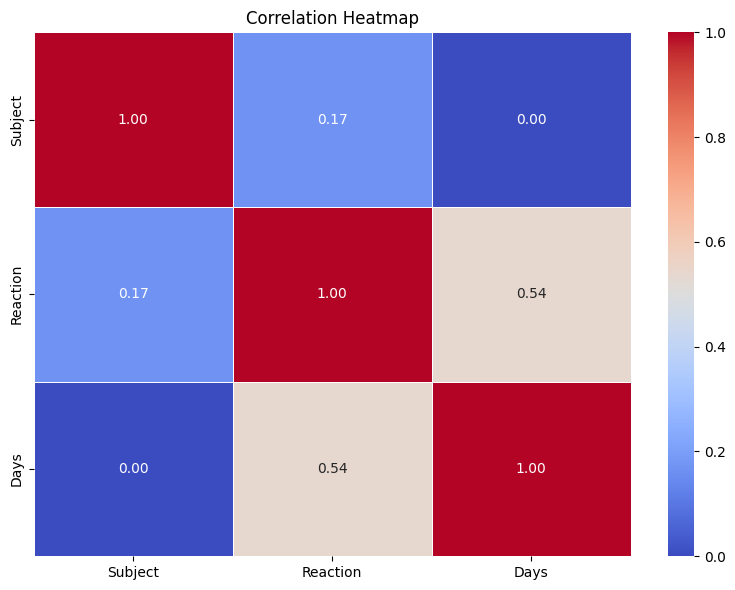

In [5]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


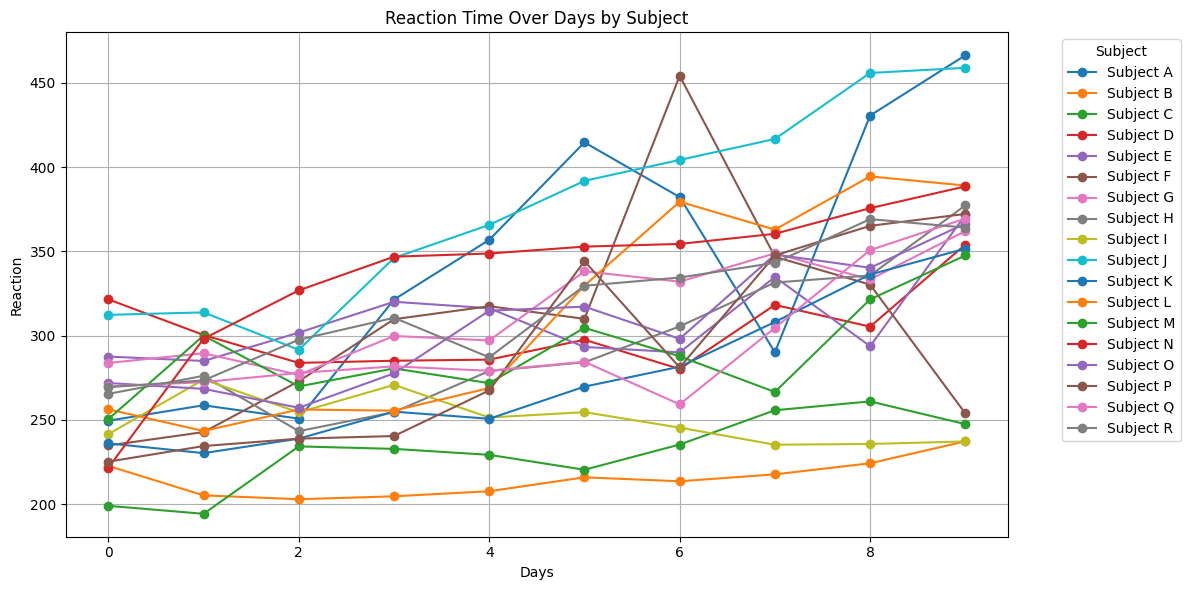

In [6]:
plt.figure(figsize=(12, 6))

unique_subjects = sorted(df['Subject'].unique())
for subject in unique_subjects:
    subject_df = df[df['Subject'] == subject]
    plt.plot(subject_df['Days'], subject_df['Reaction'], label=f'Subject {subject}', marker='o')

plt.title("Reaction Time Over Days by Subject")
plt.xlabel("Days")
plt.ylabel("Reaction")
plt.legend(title="Subject", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

plt.show()


In [7]:
for subject in unique_subjects:
    subject_df = df[df['Subject'] == subject]['Reaction']

    stat, p = stats.shapiro(subject_df)
    
    mean = round(subject_df.mean(), 2)
    std = round(subject_df.std(), 2)

    if p > 0.05:
        print(f"Subject {subject}: p = {p:.4f} → Likely Normal | μ = {mean}, σ = {std}")
    else:
        print(f"Subject {subject}: p = {p:.4f} → Not Normal")


Subject A: p = 0.3565 → Likely Normal | μ = 342.13, σ = 79.82
Subject B: p = 0.4081 → Likely Normal | μ = 215.23, σ = 10.81
Subject C: p = 0.5355 → Likely Normal | μ = 231.0, σ = 21.86
Subject D: p = 0.1201 → Likely Normal | μ = 303.22, σ = 22.91
Subject E: p = 0.0410 → Not Normal
Subject F: p = 0.1651 → Likely Normal | μ = 307.3, σ = 64.31
Subject G: p = 0.3462 → Likely Normal | μ = 316.16, σ = 30.07
Subject H: p = 0.5085 → Likely Normal | μ = 295.3, σ = 41.86
Subject I: p = 0.1892 → Likely Normal | μ = 250.07, σ = 13.83
Subject J: p = 0.5541 → Likely Normal | μ = 375.72, σ = 59.62
Subject K: p = 0.1866 → Likely Normal | μ = 275.83, σ = 42.94
Subject L: p = 0.0281 → Not Normal
Subject M: p = 0.7251 → Likely Normal | μ = 290.1, σ = 28.98
Subject N: p = 0.0270 → Not Normal
Subject O: p = 0.5773 → Likely Normal | μ = 306.03, σ = 37.46
Subject P: p = 0.0599 → Likely Normal | μ = 291.7, σ = 59.21
Subject Q: p = 0.0126 → Not Normal
Subject R: p = 0.5828 → Likely Normal | μ = 317.89, σ = 35.

In [8]:
for subject in unique_subjects:
    subject_df = df[df['Subject'] == subject]['Reaction']
    
    try:
        params = stats.gamma.fit(subject_df)
        shape, loc, scale = params
        
        stat, p = stats.kstest(subject_df, 'gamma', args=params)
        
        if p > 0.05:
            print(f"Subject {subject}: p = {p:.4f} → Likely Gamma | shape = {round(shape, 2)}, loc = {round(loc, 2)}, scale = {round(scale, 2)}")
        else:
            print(f"Subject {subject}: p = {p:.4f} → Not Gamma")
    
    except Exception as e:
        print(f"Subject {subject}: Error during fitting → {e}")


Subject A: p = 0.8495 → Likely Gamma | shape = 7.43, loc = 139.87, scale = 26.86
Subject B: p = 0.3853 → Likely Gamma | shape = 0.77, loc = 202.98, scale = 13.0
Subject C: p = 0.8622 → Likely Gamma | shape = 233.43, loc = -89.48, scale = 1.37
Subject D: p = 0.1737 → Likely Gamma | shape = 0.64, loc = 280.24, scale = 21.1
Subject E: p = 0.5056 → Likely Gamma | shape = 0.91, loc = 285.0, scale = 18.05
Subject F: p = 0.0067 → Not Gamma
Subject G: p = 0.6300 → Likely Gamma | shape = 101.47, loc = 31.0, scale = 2.81
Subject H: p = 0.2995 → Likely Gamma | shape = 0.74, loc = 243.36, scale = 54.5
Subject I: p = 0.1309 → Likely Gamma | shape = 0.56, loc = 235.31, scale = 13.86
Subject J: p = 0.9135 → Likely Gamma | shape = 1920.01, loc = -2100.86, scale = 1.29
Subject K: p = 0.0117 → Not Gamma
Subject L: p = 0.1695 → Likely Gamma | shape = 1.04, loc = 243.02, scale = 46.53
Subject M: p = 0.9971 → Likely Gamma | shape = 2.88, loc = 240.97, scale = 17.04
Subject N: p = 0.3082 → Likely Gamma | sh

In [9]:
for subject in unique_subjects:
    subject_df = df[df['Subject'] == subject]['Reaction']
    
    try:
        params = stats.expon.fit(subject_df)
        loc, scale = params
        
        stat, p = stats.kstest(subject_df, 'expon', args=params)
        
        if p > 0.05:
            print(f"Subject {subject}: p = {p:.4f} → Likely Exponential | loc = {round(loc, 2)}, scale = {round(scale, 2)}")
        else:
            print(f"Subject {subject}: p = {p:.4f} → Not Exponential")
    
    except Exception as e:
        print(f"Subject {subject}: Error during fitting → {e}")


Subject A: p = 0.7178 → Likely Exponential | loc = 249.56, scale = 92.57
Subject B: p = 0.8440 → Likely Exponential | loc = 202.98, scale = 12.26
Subject C: p = 0.2228 → Likely Exponential | loc = 194.33, scale = 36.67
Subject D: p = 0.8230 → Likely Exponential | loc = 280.24, scale = 22.98
Subject E: p = 0.7533 → Likely Exponential | loc = 285.0, scale = 24.44
Subject F: p = 0.5124 → Likely Exponential | loc = 234.86, scale = 72.44
Subject G: p = 0.4637 → Likely Exponential | loc = 276.77, scale = 39.39
Subject H: p = 0.8954 → Likely Exponential | loc = 243.36, scale = 51.94
Subject I: p = 0.8603 → Likely Exponential | loc = 235.31, scale = 14.76
Subject J: p = 0.7678 → Likely Exponential | loc = 291.61, scale = 84.11
Subject K: p = 0.9896 → Likely Exponential | loc = 230.32, scale = 45.52
Subject L: p = 0.5741 → Likely Exponential | loc = 243.45, scale = 70.15
Subject M: p = 0.5686 → Likely Exponential | loc = 250.53, scale = 39.57
Subject N: p = 0.0621 → Likely Exponential | loc = 2

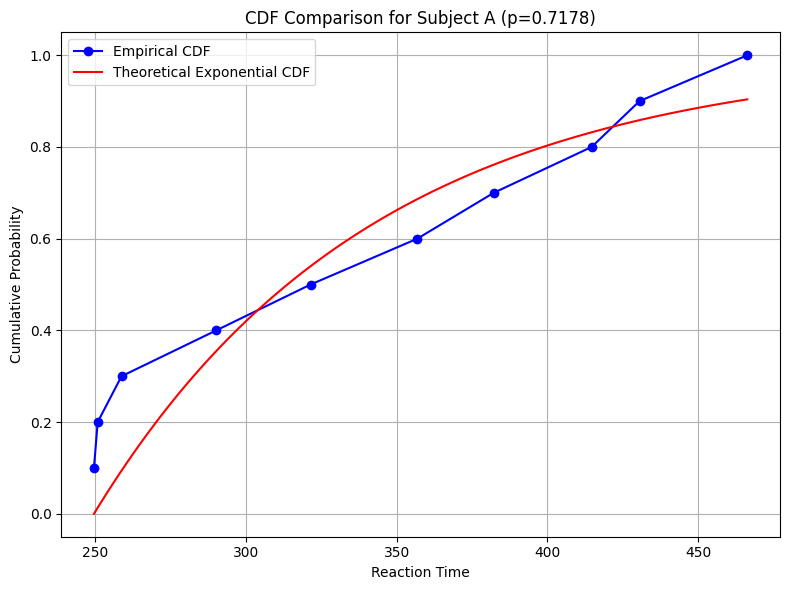

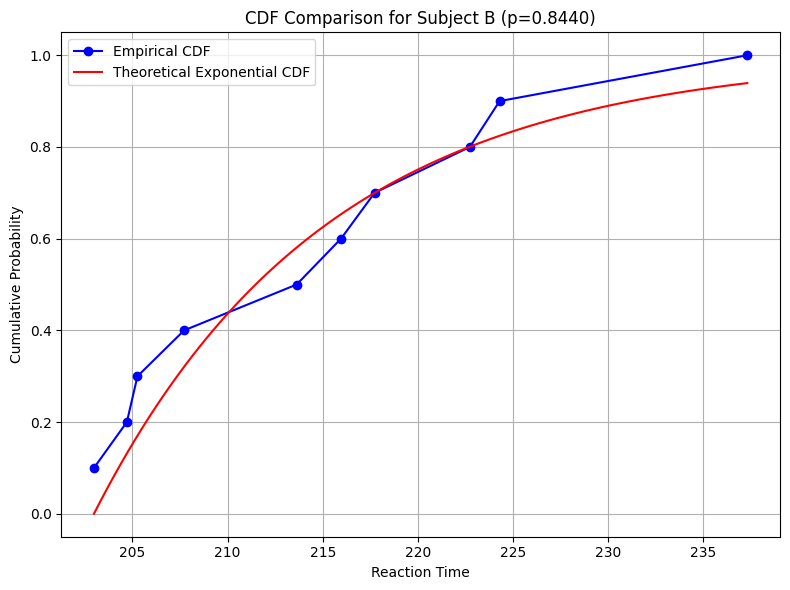

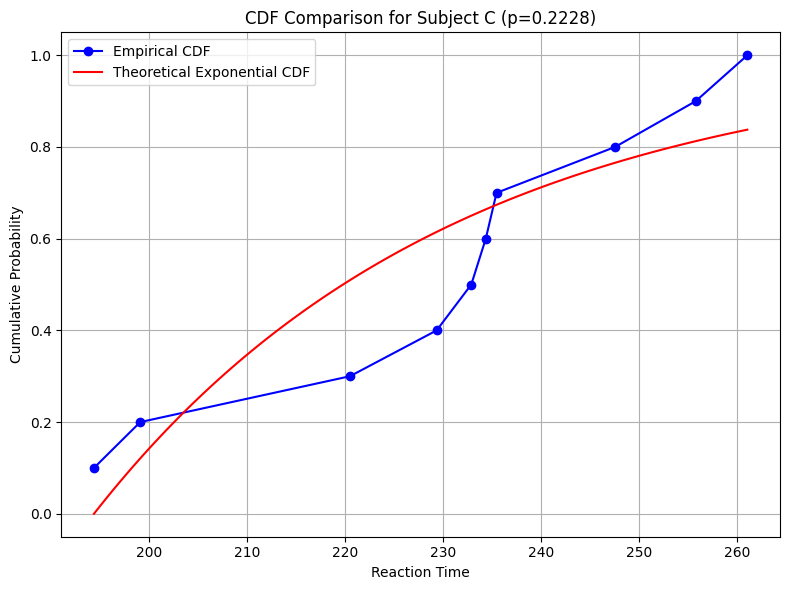

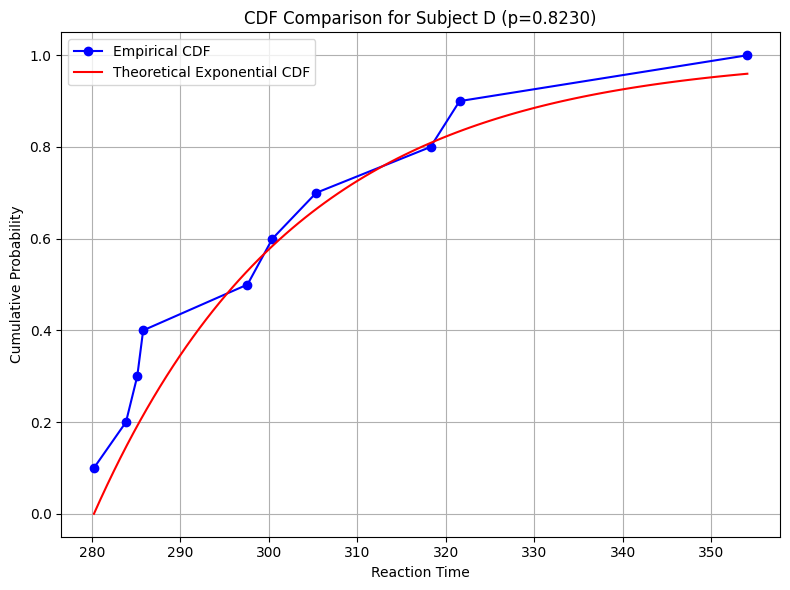

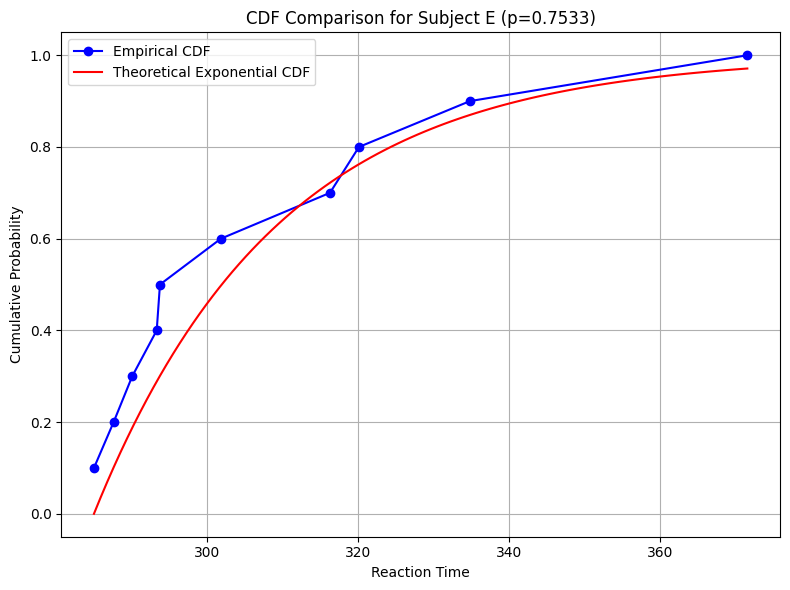

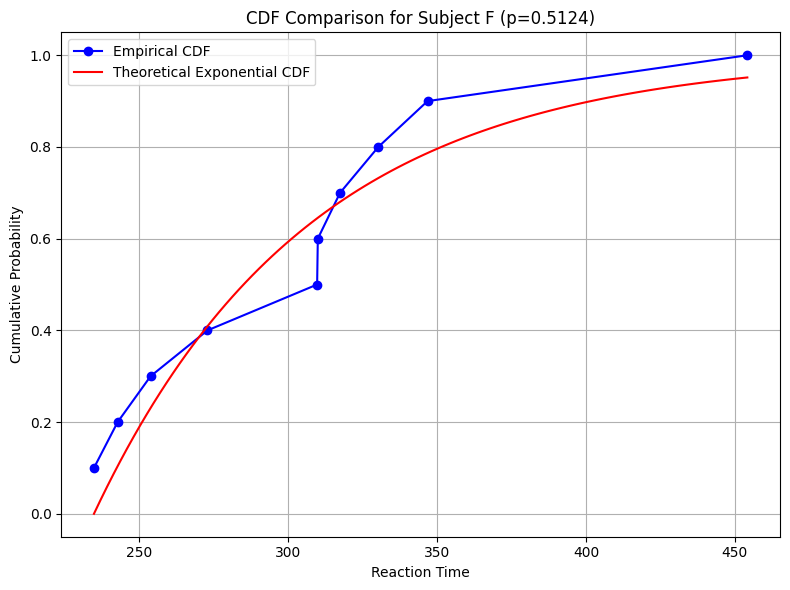

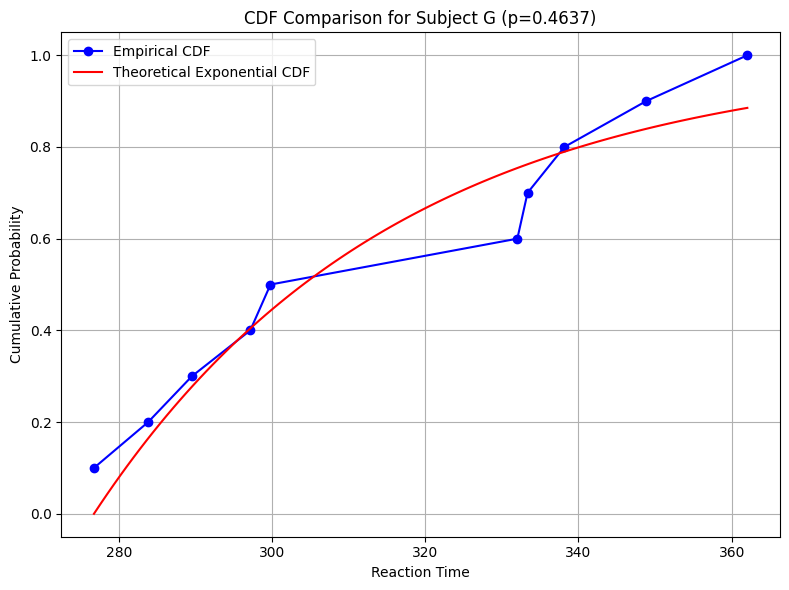

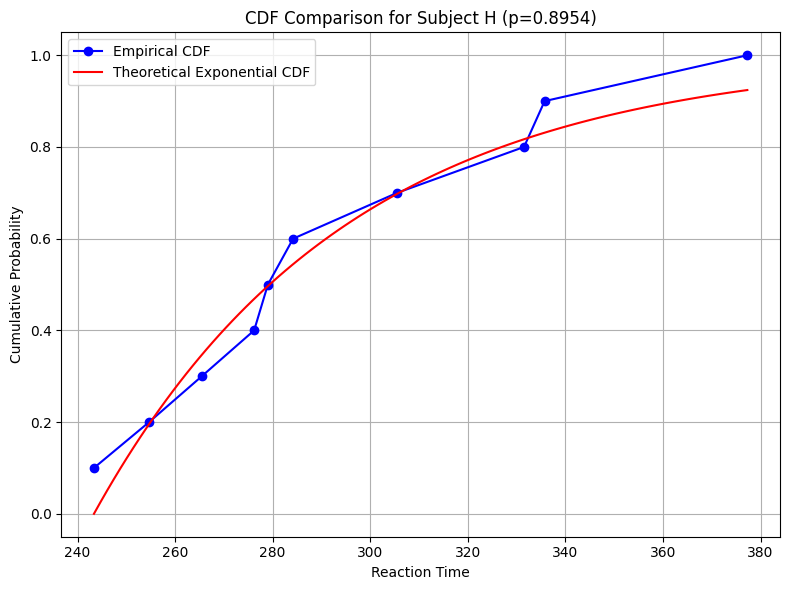

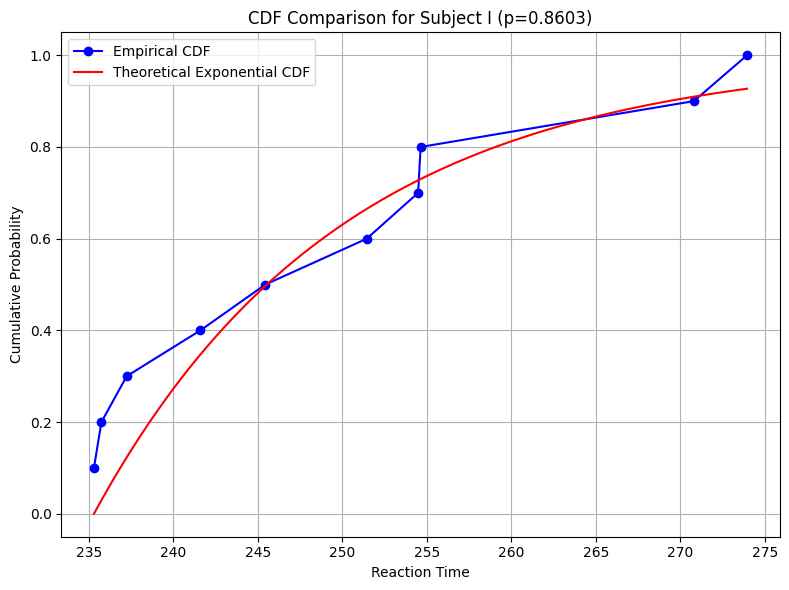

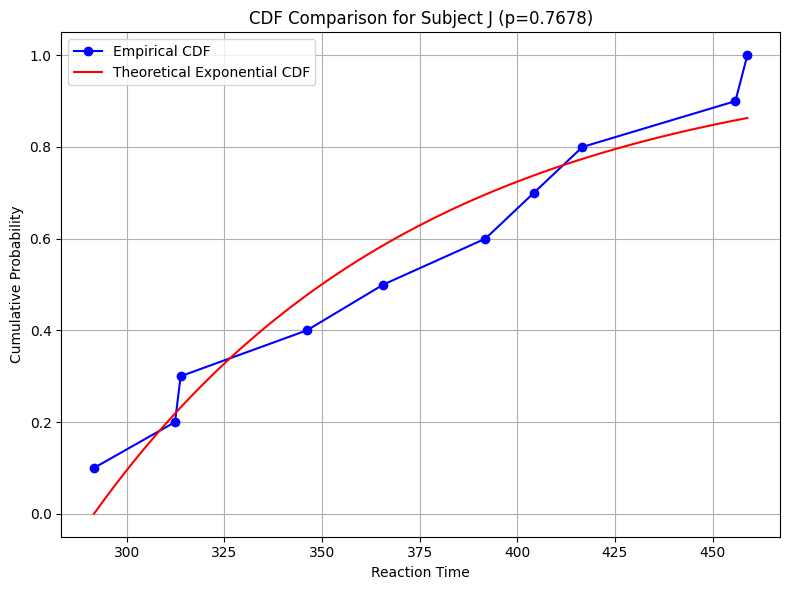

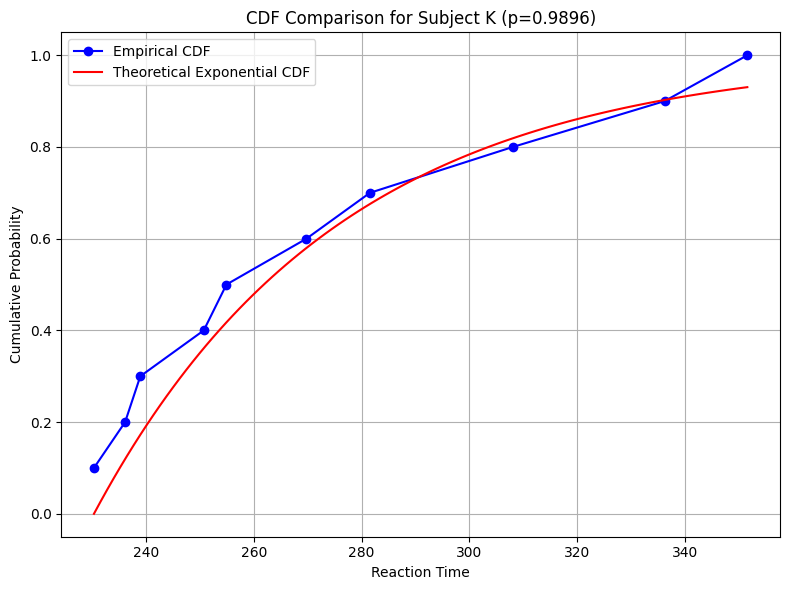

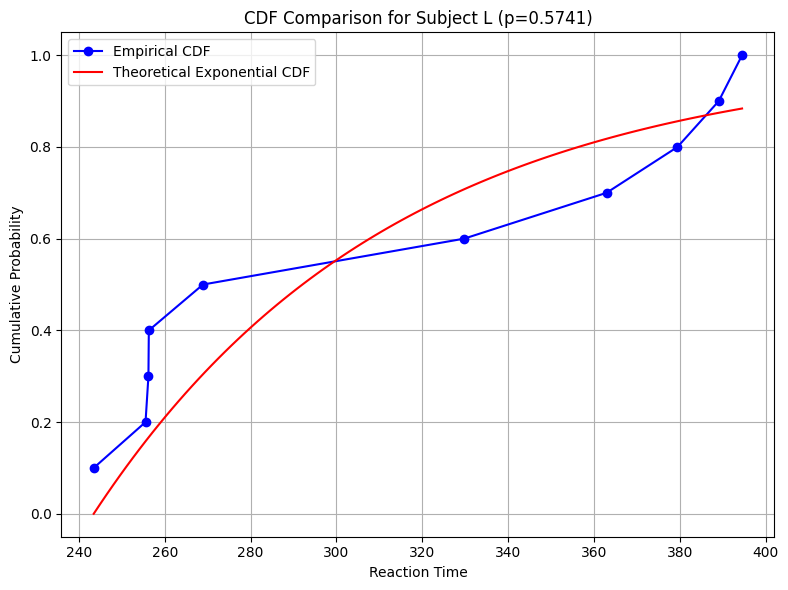

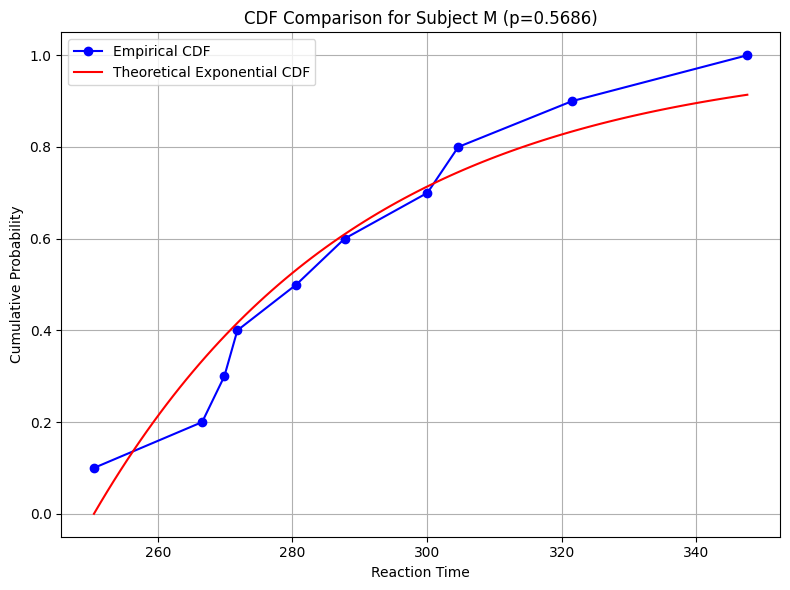

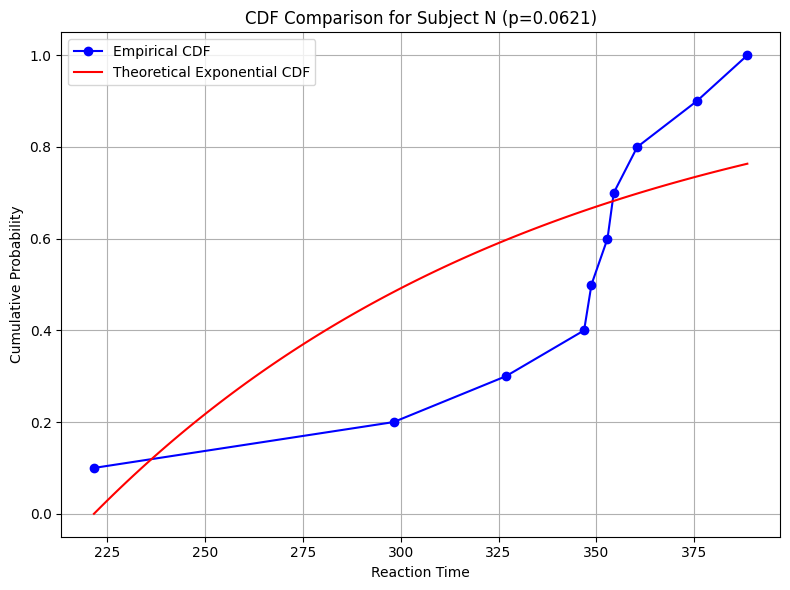

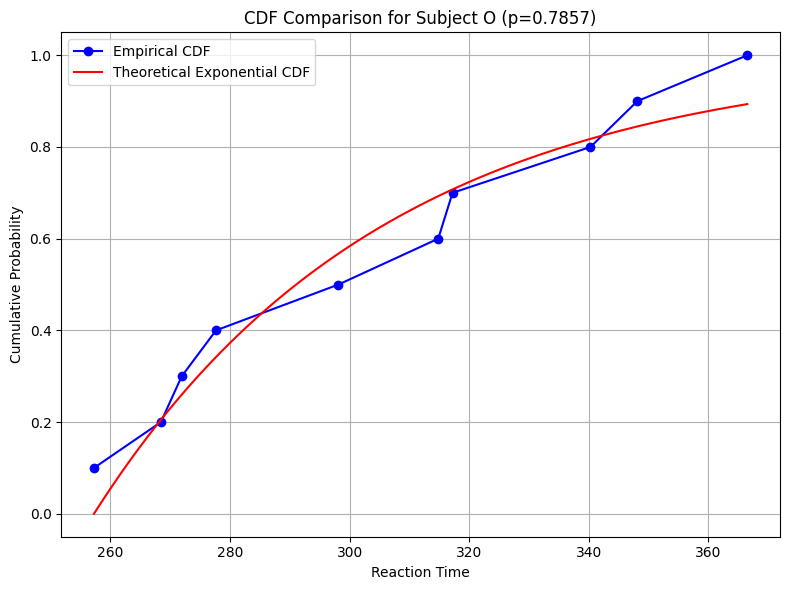

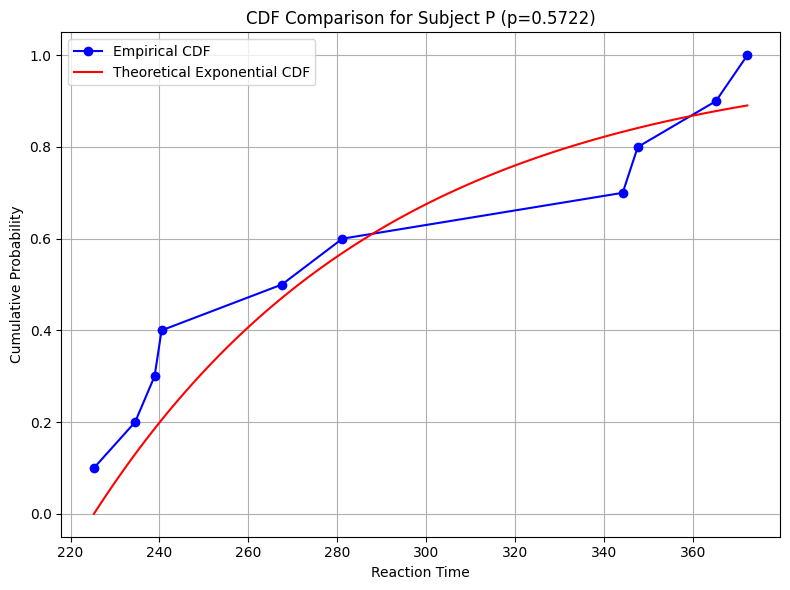

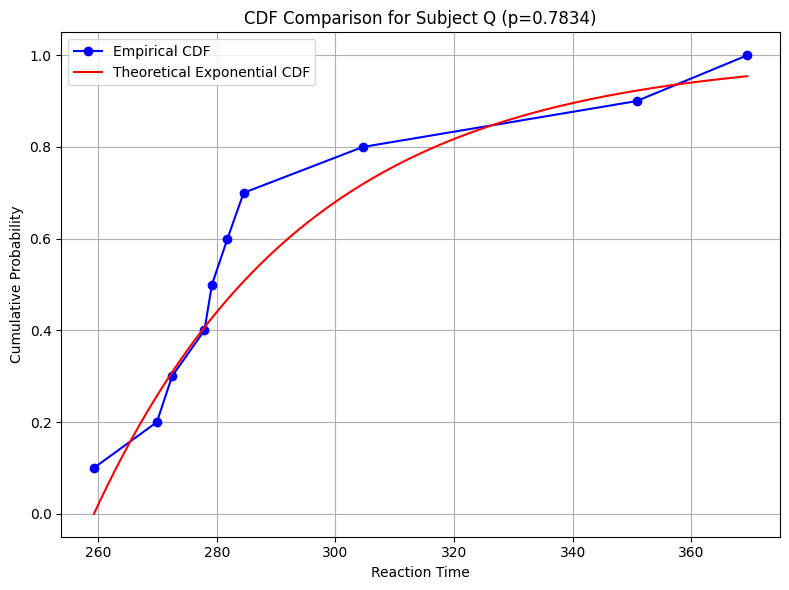

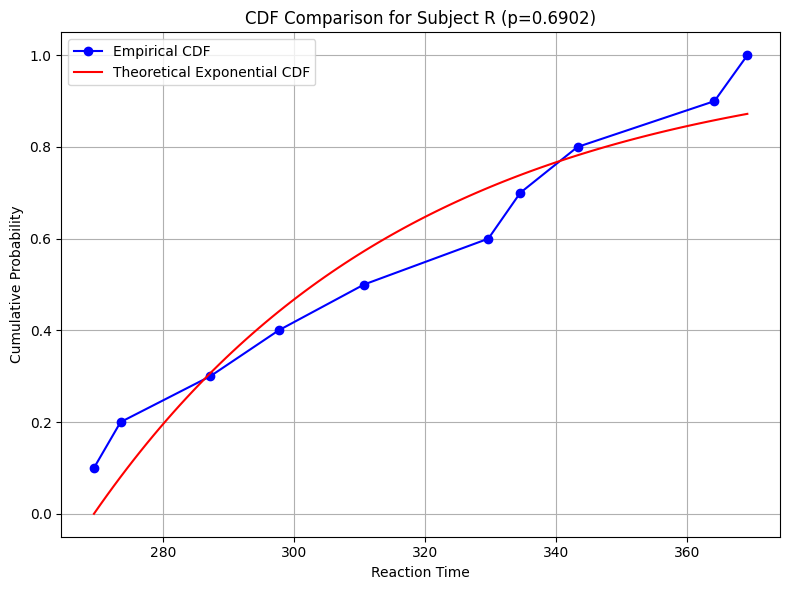

In [10]:
for subject in unique_subjects:
   subject_df = df[df['Subject'] == subject]
   reaction_data = subject_df['Reaction'].values
   
   try:
       params = stats.expon.fit(reaction_data)
       loc, scale = params
       
       stat, p = stats.kstest(reaction_data, 'expon', args=params)
       
       fig, ax = plt.subplots(figsize=(8, 6))
       
       reaction_sorted = np.sort(reaction_data)
       ecdf = np.arange(1, len(reaction_sorted) + 1) / len(reaction_sorted)
       
       ax.plot(reaction_sorted, ecdf, 'b-', marker='o', label='Empirical CDF')
       
       x_theor = np.linspace(min(reaction_data), max(reaction_data), 100)
       cdf_theor = stats.expon.cdf(x_theor, loc=loc, scale=scale)
       ax.plot(x_theor, cdf_theor, 'r-', label=f'Theoretical Exponential CDF')
       
       ax.set_title(f"CDF Comparison for Subject {subject} (p={p:.4f})")
       ax.set_xlabel("Reaction Time")
       ax.set_ylabel("Cumulative Probability")
       ax.legend()
       ax.grid(True)
       
       plt.tight_layout()
       plt.show()
       
   except Exception as e:
       print(f"Subject {subject}: Error during fitting → {e}")

In [11]:
subjects = []
means = []
medians = []
iqrs = []
mins = []
maxs = []
stddevs = []

for subject in unique_subjects:
    subject_df = df[df['Subject'] == subject]['Reaction']
    
    subjects.append(subject)
    means.append(round(float(subject_df.mean()), 2))
    medians.append(round(float(subject_df.median()), 2))
    iqrs.append(round(float(np.percentile(subject_df, 75) - np.percentile(subject_df, 25)), 2))
    mins.append(round(float(subject_df.min()), 2))
    maxs.append(round(float(subject_df.max()), 2))
    stddevs.append(round(float(subject_df.std()), 2))

print("Subjects:", subjects)
print("Means:", means)
print("Medians:", medians)
print("IQRs:", iqrs)
print("Minimums:", mins)
print("Maximums:", maxs)
print("Standard Deviations:", stddevs)


Subjects: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R']
Means: [342.13, 215.23, 231.0, 303.22, 309.44, 307.3, 316.16, 295.3, 250.07, 375.72, 275.83, 313.6, 290.1, 337.42, 306.03, 291.7, 294.98, 317.89]
Medians: [339.15, 214.8, 233.58, 298.99, 297.78, 309.88, 315.92, 281.61, 248.45, 378.79, 262.35, 299.32, 284.17, 350.78, 306.48, 274.34, 280.48, 320.12]
IQRs: [140.0, 15.6, 21.82, 29.73, 28.27, 68.45, 45.51, 56.87, 16.26, 91.7, 59.6, 119.09, 33.11, 27.06, 61.16, 107.44, 25.79, 51.26]
Minimums: [249.56, 202.98, 194.33, 280.24, 285.0, 234.86, 276.77, 243.36, 235.31, 291.61, 230.32, 243.45, 250.53, 221.68, 257.24, 225.26, 259.27, 269.41]
Maximums: [466.35, 237.31, 261.01, 354.05, 371.58, 454.16, 362.04, 377.3, 273.95, 458.92, 351.65, 394.49, 347.57, 388.54, 366.51, 372.23, 369.47, 369.14]
Standard Deviations: [79.82, 10.81, 21.86, 22.91, 27.24, 64.31, 30.07, 41.86, 13.83, 59.62, 42.94, 63.36, 28.98, 47.6, 37.46, 59.21, 36.51, 35.82]


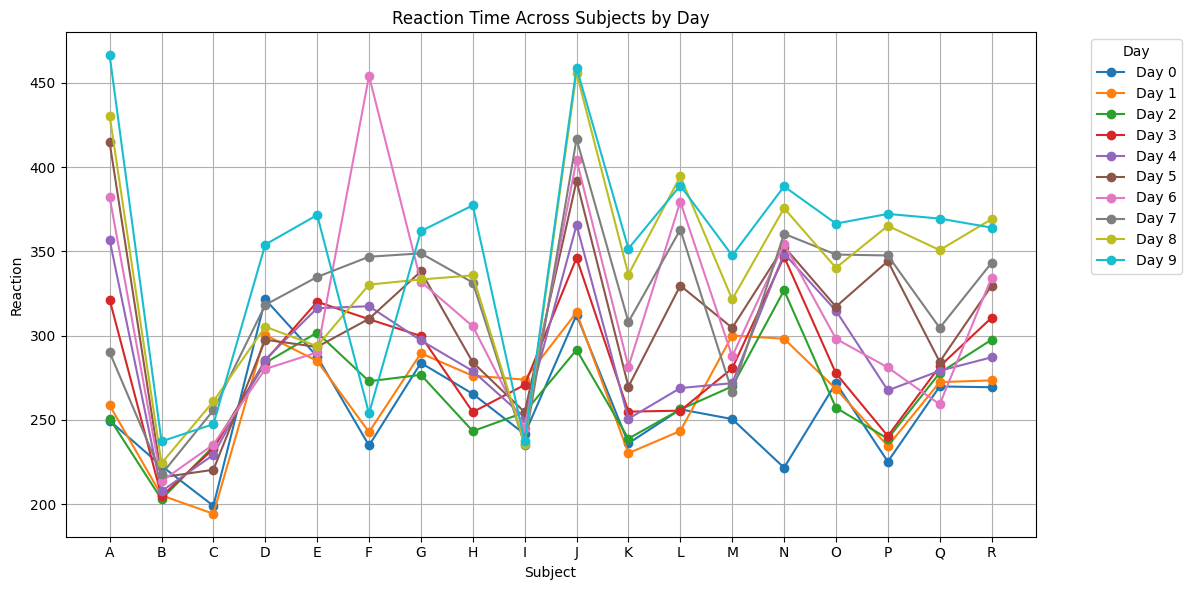

In [12]:
plt.figure(figsize=(12, 6))

unique_days = sorted(df['Days'].unique())

for day in unique_days:
    day_df = df[df['Days'] == day]
    plt.plot(day_df['Subject'], day_df['Reaction'], label=f'Day {day}', marker='o')

plt.title("Reaction Time Across Subjects by Day")
plt.xlabel("Subject")
plt.ylabel("Reaction")
plt.legend(title="Day", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [13]:
for day in unique_days:
    day_df = df[df['Days'] == day]
    stat, p = stats.shapiro(day_df['Reaction'])

    mean = round(day_df['Reaction'].mean(), 2)
    std = round(day_df['Reaction'].std(), 2)

    if p > 0.05:
        print(f"Day {day}: p = {p:.4f} → Likely Normal Distribution | μ = {mean}, σ = {std}")
    else:
        print(f"Day {day}: p = {p:.4f} → Not Normal Distribution")


Day 0: p = 0.9093 → Likely Normal Distribution | μ = 256.65, σ = 32.13
Day 1: p = 0.3880 → Likely Normal Distribution | μ = 264.5, σ = 33.43
Day 2: p = 0.9936 → Likely Normal Distribution | μ = 265.36, σ = 29.47
Day 3: p = 0.9190 → Likely Normal Distribution | μ = 282.99, σ = 38.86
Day 4: p = 0.8427 → Likely Normal Distribution | μ = 288.65, σ = 42.54
Day 5: p = 0.9271 → Likely Normal Distribution | μ = 308.52, σ = 51.77
Day 6: p = 0.5847 → Likely Normal Distribution | μ = 312.18, σ = 63.17
Day 7: p = 0.3724 → Likely Normal Distribution | μ = 318.75, σ = 50.1
Day 8: p = 0.8186 → Likely Normal Distribution | μ = 336.63, σ = 60.2
Day 9: p = 0.0134 → Not Normal Distribution


In [14]:
for day in unique_days:
    day_df = df[df['Days'] == day]['Reaction']
    
    try:
        params = stats.gamma.fit(day_df)
        stat, p = stats.kstest(day_df, 'gamma', args=params)
        
        shape, loc, scale = params

        if p > 0.05:
            print(f"Day {day}: p = {p:.4f} → Likely Gamma | shape = {round(shape, 2)}, loc = {round(loc, 2)}, scale = {round(scale, 2)}")
        else:
            print(f"Day {day}: p = {p:.4f} → Not Gamma")
    
    except Exception as e:
        print(f"Day {day}: Error → {e}")


Day 0: p = 0.9986 → Likely Gamma | shape = 17.08, loc = 126.83, scale = 7.6
Day 1: p = 0.6256 → Likely Gamma | shape = 293.11, loc = -307.23, scale = 1.95
Day 2: p = 0.9668 → Likely Gamma | shape = 2256.84, loc = -1095.37, scale = 0.6
Day 3: p = 0.9886 → Likely Gamma | shape = 927.44, loc = -870.54, scale = 1.24
Day 4: p = 0.9613 → Likely Gamma | shape = 87.46, loc = -98.58, scale = 4.43
Day 5: p = 0.9889 → Likely Gamma | shape = 295.59, loc = -556.6, scale = 2.93
Day 6: p = 0.9141 → Likely Gamma | shape = 4.69, loc = 175.89, scale = 29.05
Day 7: p = 0.6505 → Likely Gamma | shape = 288.5, loc = -523.98, scale = 2.92
Day 8: p = 0.9036 → Likely Gamma | shape = 2941.92, loc = -2835.93, scale = 1.08
Day 9: p = 0.1220 → Likely Gamma | shape = 328.25, loc = -851.81, scale = 3.66


In [15]:
for day in unique_days:
    day_df = df[df['Days'] == day]['Reaction']
    
    try:
        params = stats.expon.fit(day_df)
        stat, p = stats.kstest(day_df, 'expon', args=params)
        
        loc, scale = params

        if p > 0.05:
            print(f"Day {day}: p = {p:.4f} → Likely Exponential | loc = {round(loc, 2)}, scale = {round(scale, 2)}")
        else:
            print(f"Day {day}: p = {p:.4f} → Not Exponential")
    
    except Exception as e:
        print(f"Day {day}: Error → {e}")


Day 0: p = 0.1213 → Likely Exponential | loc = 199.05, scale = 57.6
Day 1: p = 0.0777 → Likely Exponential | loc = 194.33, scale = 70.16
Day 2: p = 0.0236 → Not Exponential
Day 3: p = 0.0553 → Likely Exponential | loc = 204.71, scale = 78.29
Day 4: p = 0.0608 → Likely Exponential | loc = 207.72, scale = 80.93
Day 5: p = 0.0632 → Likely Exponential | loc = 215.96, scale = 92.56
Day 6: p = 0.1217 → Likely Exponential | loc = 213.63, scale = 98.55
Day 7: p = 0.0634 → Likely Exponential | loc = 217.73, scale = 101.02
Day 8: p = 0.0601 → Likely Exponential | loc = 224.3, scale = 112.33
Day 9: p = 0.0042 → Not Exponential


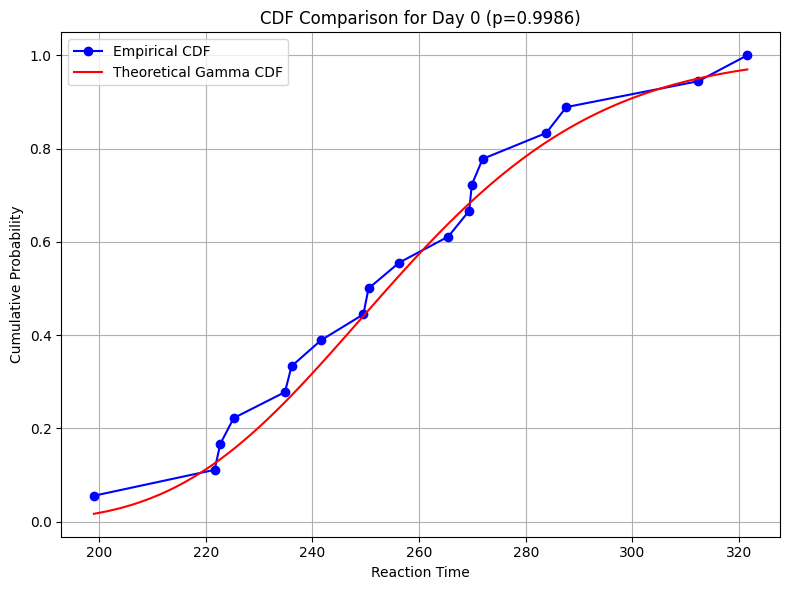

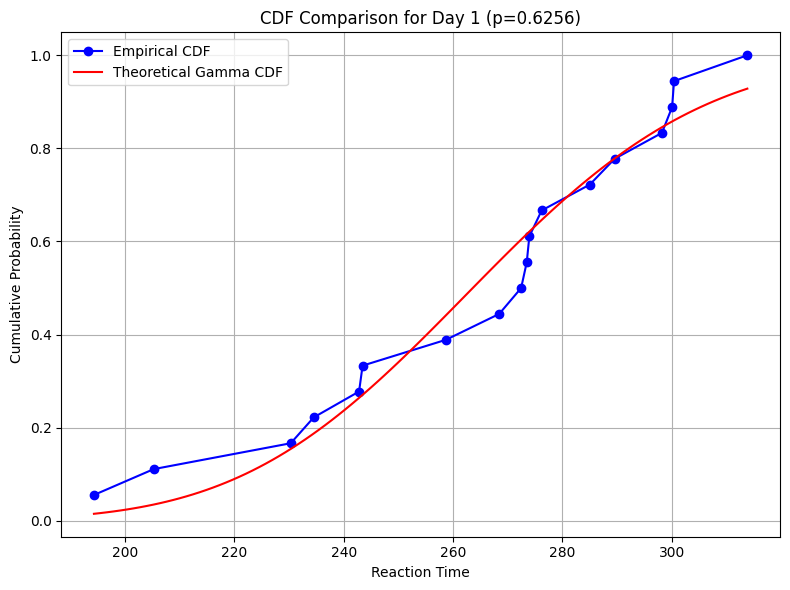

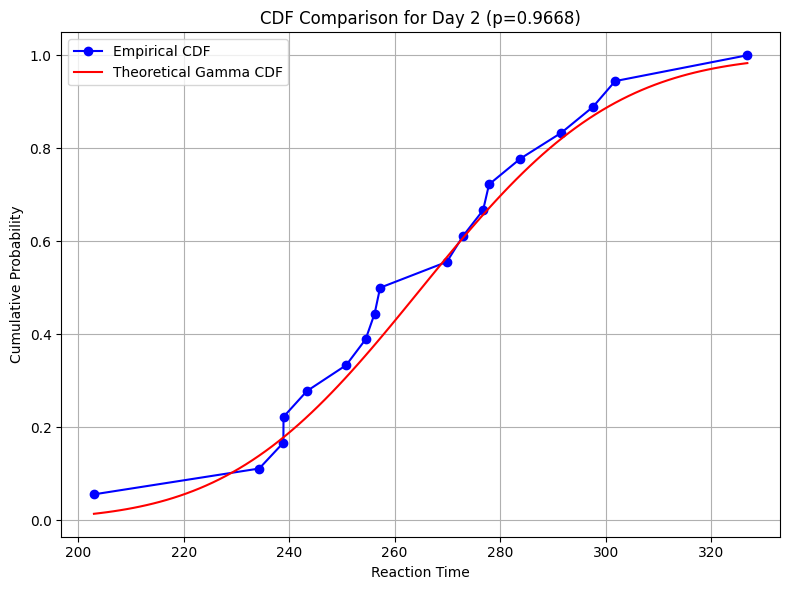

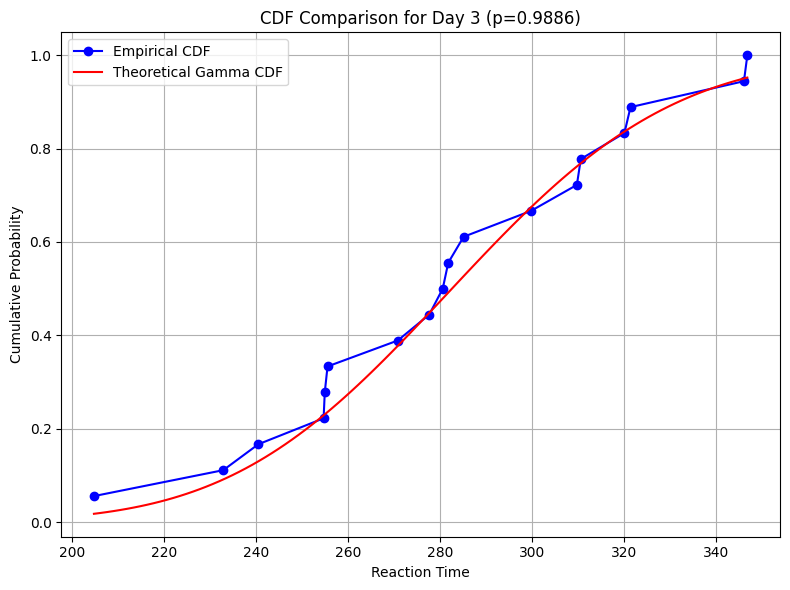

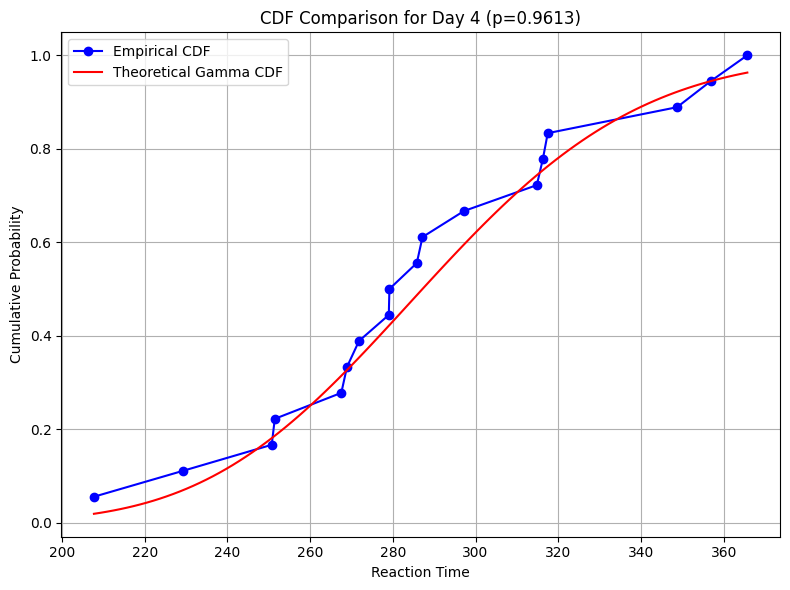

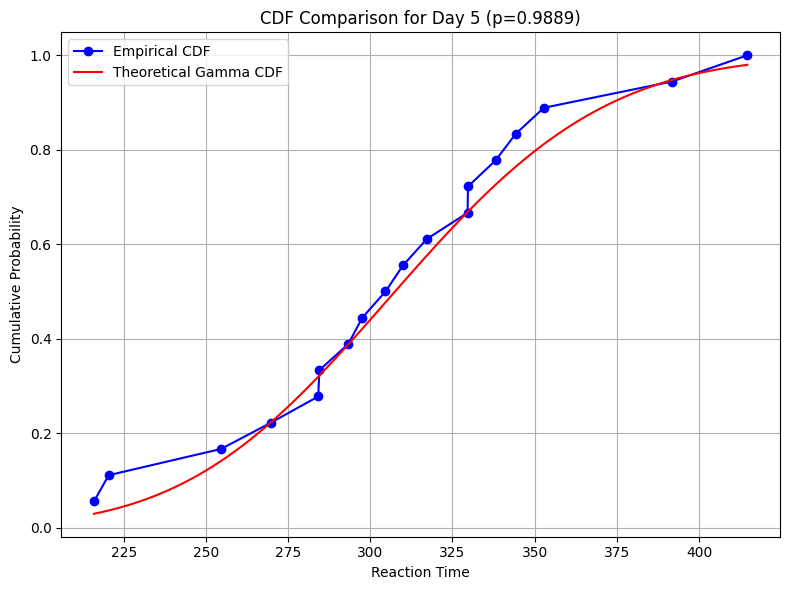

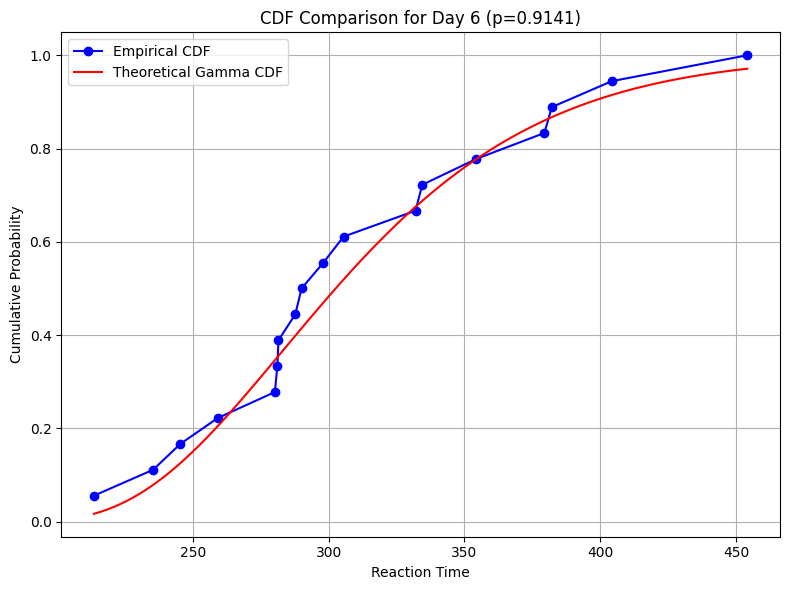

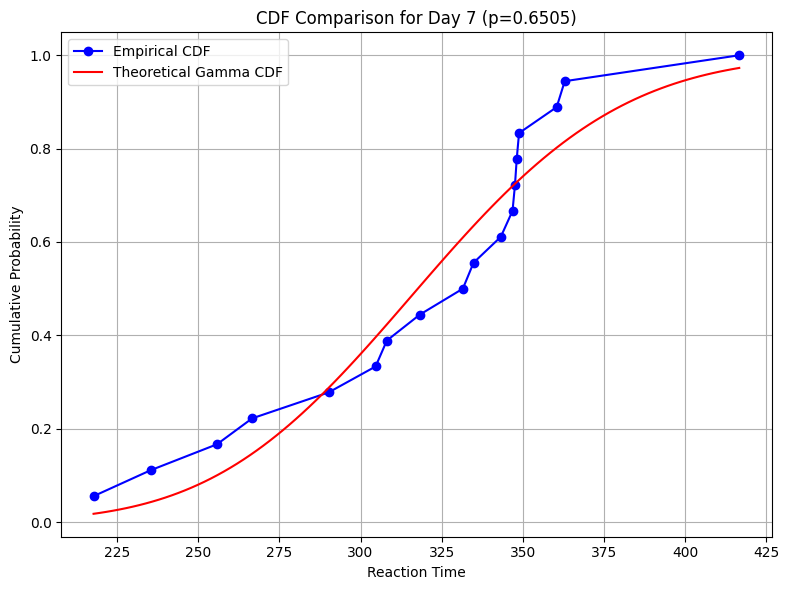

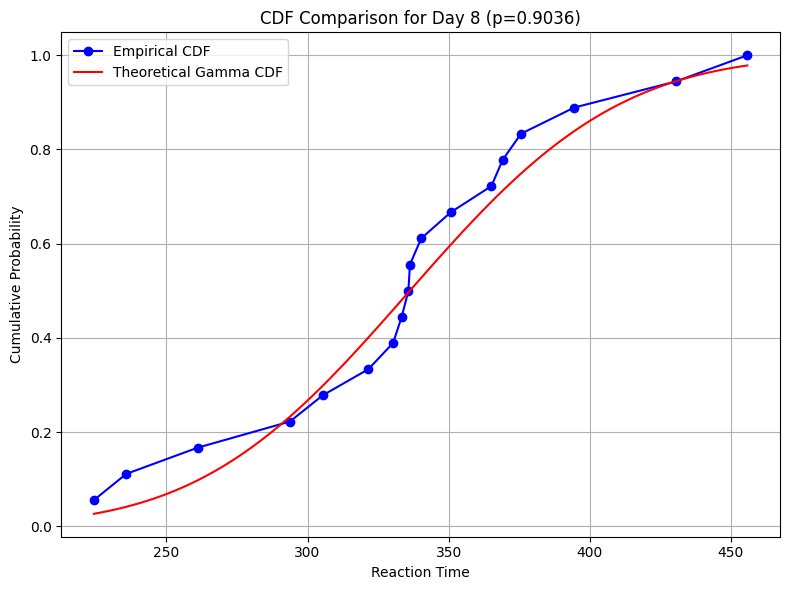

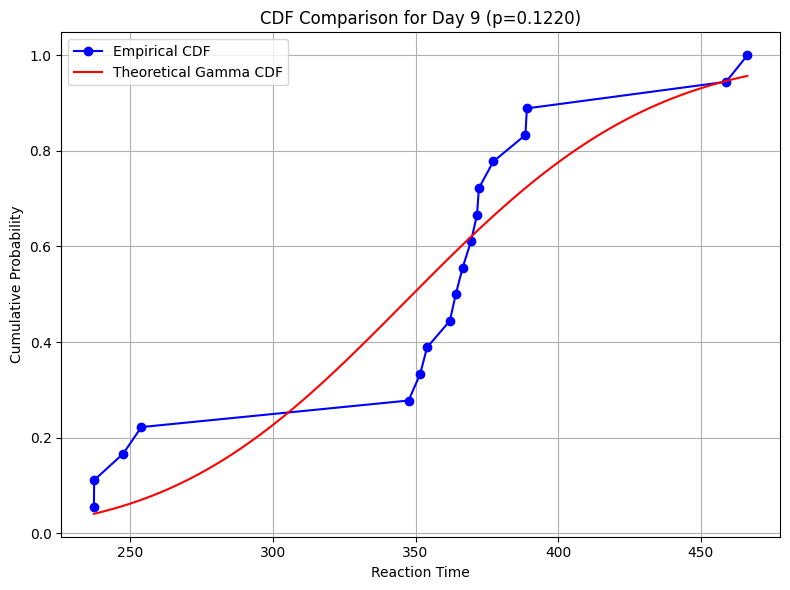

In [16]:
for day in unique_days:
    day_df = df[df['Days'] == day]
    reaction_data = day_df['Reaction'].values
    
    try:
        params = stats.gamma.fit(reaction_data)
        a, loc, scale = params
        
        stat, p = stats.kstest(reaction_data, 'gamma', args=params)
        
        fig, ax = plt.subplots(figsize=(8, 6))
        
        reaction_sorted = np.sort(reaction_data)
        ecdf = np.arange(1, len(reaction_sorted) + 1) / len(reaction_sorted)
        
        ax.plot(reaction_sorted, ecdf, 'b-', marker='o', label='Empirical CDF')
        
        x_theor = np.linspace(min(reaction_data), max(reaction_data), 100)
        cdf_theor = stats.gamma.cdf(x_theor, a, loc=loc, scale=scale)
        ax.plot(x_theor, cdf_theor, 'r-', label=f'Theoretical Gamma CDF')
        
        ax.set_title(f"CDF Comparison for Day {day} (p={p:.4f})")
        ax.set_xlabel("Reaction Time")
        ax.set_ylabel("Cumulative Probability")
        ax.legend()
        ax.grid(True)
        
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"Day {day}: Error during fitting → {e}")

In [17]:
days = []
means = []
medians = []
iqrs = []
mins = []
maxs = []
stddevs = []

for day in unique_days:
    day_df = df[df['Days'] == day]['Reaction']
    
    days.append(day)
    means.append(round(float(day_df.mean()), 2))
    medians.append(round(float(day_df.median()), 2))
    iqrs.append(round(float(np.percentile(day_df, 75) - np.percentile(day_df, 25)), 2))
    mins.append(round(float(day_df.min()), 2))
    maxs.append(round(float(day_df.max()), 2))
    stddevs.append(round(float(day_df.std()), 2))

print("Days:", days)
print("Means:", means)
print("Medians:", medians)
print("IQRs:", iqrs)
print("Minimums:", mins)
print("Maximums:", maxs)
print("Standard Deviations:", stddevs)


Days: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Means: [256.65, 264.5, 265.36, 282.99, 288.65, 308.52, 312.18, 318.75, 336.63, 350.85]
Medians: [253.41, 272.96, 263.57, 281.19, 282.48, 307.32, 294.11, 333.17, 336.01, 365.32]
IQRs: [36.24, 45.44, 37.14, 55.34, 48.03, 51.78, 68.97, 54.22, 58.75, 27.45]
Minimums: [199.05, 194.33, 202.98, 204.71, 207.72, 215.96, 213.63, 217.73, 224.3, 237.25]
Maximums: [321.54, 313.81, 326.88, 346.86, 365.73, 414.69, 454.16, 416.69, 455.86, 466.35]
Standard Deviations: [32.13, 33.43, 29.47, 38.86, 42.54, 51.77, 63.17, 50.1, 60.2, 66.99]
